<a href="https://colab.research.google.com/github/pawel045/machine-learning-basics/blob/main/Spot_False_Banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
# read data
data = pd.read_csv('https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/files/banknotes.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [ ]:
# chceck the class values
data['class'].unique()

array([1, 0])

In [ ]:
# check missing data in dataframe
data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [ ]:
X = data[['variance', 'skewness', 'curtosis', 'entropy']]
y = data['class']

In [ ]:
# create train-test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
model = Sequential()

# add layers
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train a model with 20 iter and check accuracy
model.fit(X_train, y_train, epochs=20)
_, accuracy = model.evaluate(X_test, y_test, verbose=2)
accuracy

Epoch 1/20
26/26 [==============================] - 1s 5ms/step - loss: 0.7241 - accuracy: 0.4557
Epoch 2/20
26/26 [==============================] - 0s 6ms/step - loss: 0.6529 - accuracy: 0.6124
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.6025 - accuracy: 0.7315
Epoch 4/20
26/26 [==============================] - 0s 5ms/step - loss: 0.5522 - accuracy: 0.7667
Epoch 5/20
26/26 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.8141
Epoch 6/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8578
Epoch 7/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.9028
Epoch 8/20
26/26 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.9344
Epoch 9/20
26/26 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9478
Epoch 10/20
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - accuracy: 0.9526
Epoch 11/20
26/26 [

0.9908925294876099

313/313 [==============================] - 2s 5ms/step


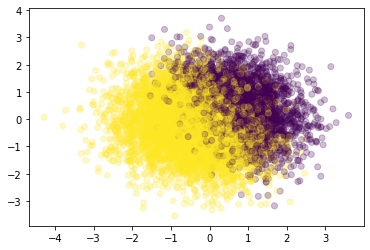

In [ ]:
# prediction for random dataset
import matplotlib.pyplot as plt
from numpy import where
from numpy.random import randn

new_X = randn(10000, 4)

new_y = model.predict(new_X)
new_y = where(new_y > 0.5, 1, 0)

fig, ax = plt.subplots()

ax.scatter(x=new_X[:, 0], y=new_X[:, 1], c=new_y, alpha=0.25)
# ax.scatter(x=new_X[:, 1], y=new_X[:, 2], c=new_y)
# ax.scatter(x=new_X[:, 2], y=new_X[:, 3], c=new_y)
# ax.scatter(x=new_X[:, 0], y=new_X[:, 3], c=new_y)